<h2>Abdulrahman Alabrash </h2>
<h2>0068383 </h2>
<h3>ML HW 7</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
data = pd.read_csv("/Users/abdulrhmanalabrash/Desktop/hw7/training_data.csv",header=0)


In [3]:
int(len(data) * .10)

30000

In [4]:
data = data[0 : int(len(data) * .1)]
data

,F01,F02,F03_A,F03_B,F03_C,F03_D,F03_E,F03_F,F04_A,F04_B,...,F63_09,F63_10,F63_11,F63_12,F63_13,F63_14,F63_15,F63_16,F63_17,F63_18
0,750,371,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,750,371,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,750,600,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,750,600,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,750,600,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,750,600,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,750,600,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,750,429,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,750,414,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,750,414,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(30000, 143)

In [6]:
# now lets draw a correlation graph so that we can remove multi colinearity it means the columns are
# dependenig on each other so we should avoid it because what is the use of using same column twice
# lets check the correlation between features
# now we will do this analysis only for features_mean then we will do for others and will see who is doing best
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
corr = data[0:100,0:100].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm') # for more on heatmap you can visit Link(http://seaborn.pydata.org/generated/seaborn.heatmap.html)

TypeError: unhashable type: 'slice'

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 143 entries, F01 to F63_18
dtypes: int64(143)
memory usage: 32.7 MB


In [8]:
criteria=data.apply(lambda x: x.nunique()>1)#data.nunique()>1
data=data[criteria.index[criteria]]

In [9]:
data.shape

(30000, 67)

In [10]:
train_X = data# taking the training data input 
train_y=pd.read_csv("/Users/abdulrhmanalabrash/Desktop/hw7/training_labels.csv",header=None)
train_y=train_y[0 : int(len(train_y) * .1)]# This is output of our training data
# same we have to do for test
test_X= pd.read_csv("/Users/abdulrhmanalabrash/Desktop/hw7/test_data.csv",header=0)
test_X=test_X[0 : int(len(test_X) * .1)]# taking test data inputs
#test_y =   #output value of test dat

<h3>RandomForestClassifier</h3>


In [15]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(train_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of dignosis column for test inputs
metrics.accuracy_score(prediction,train_y) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9752666666666666

<h3>Support Vector Machine </h3>


In [16]:
%%time
model = svm.SVC(kernel='rbf', gamma=0.00001, probability=True)

CPU times: user 669 µs, sys: 9.47 ms, total: 10.1 ms
Wall time: 10.1 ms


In [ ]:
%%time
model.fit(train_X,train_y)

/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
%%time
prediction=model.predic_proba(train_X)
#metrics.aucaccuracy_score(prediction,test_y)

rbf_svc.predict_proba=rbf_svc.predict_proba(test_X)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_true=train_y, y_score=prediction[:,1], pos_label=2)
metrics.auc(fpr,tpr)

In [34]:
# NORMALIZE DATA
X = preprocessing.scale(X)
TestX = preprocessing.scale(TestX)
#SVM GATHER DATA
rbf_svc = smv.SVC(kernel='rbf', gamma=0.00001, C=1000,probability=True).fit(train_X,train_y )
predictedprobSVC = rbf_svc.predict_proba(test_X)
fpr, tpr, thresholds = roc_curve(train_y, prediction[:,1], pos_label=2)
roc_auc = auc(fpr, tpr)
#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

IndexError: too many indices for array

In [40]:
metrics.roc_curve?

In [30]:
model = svm.SVC()
model.predict?

<h3>Logical Regreesion  </h3>


In [24]:
model=LogisticRegression(C=100)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9235294117647059

<h3>selecte all features </h3>


In [25]:
prediction_var = features_mean # taking all features
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

<h3>Random Forest Classifier without features selection </h3>


In [26]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of dignosis column for test inputs
metrics.accuracy_score(prediction,test_y) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.9352941176470588

this is the property of Random Forest classifier that it provide us the importance of the features used

In [27]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) 

concave points_mean       0.280376
area_mean                 0.167927
perimeter_mean            0.150962
concavity_mean            0.130981
radius_mean               0.101368
texture_mean              0.050365
compactness_mean          0.048714
smoothness_mean           0.032883
fractal_dimension_mean    0.021165
symmetry_mean             0.015258
dtype: float64


<h3>Support Vector Machine without features selection</h3>


In [28]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.6529411764705882

<h3>Logical Regreesion without features selection  </h3>


In [29]:
model=LogisticRegression(C=100)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9294117647058824

as you can see the accuracy of SVM decrease very much
now lets take only top 5 important features given by Random Forest classifier

In [30]:
prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']

In [31]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

<h3>Support Vector Machine with top 5 important features given by Random Forest classifier </h3>


In [32]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.6882352941176471

<h3>Logical Regreesion without features selection with top 5 important features given by Random Forest classifier  </h3>


In [33]:
model=LogisticRegression(C=100)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9117647058823529

FEATURES_WORST

In [34]:
prediction_var = features_worst
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis


In [35]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.6294117647058823

In [36]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9588235294117647

In [37]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

area_worst                 0.223741
perimeter_worst            0.213891
concave points_worst       0.179324
radius_worst               0.176551
concavity_worst            0.067449
compactness_worst          0.038413
smoothness_worst           0.031272
texture_worst              0.027343
symmetry_worst             0.023831
fractal_dimension_worst    0.018185
dtype: float64


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


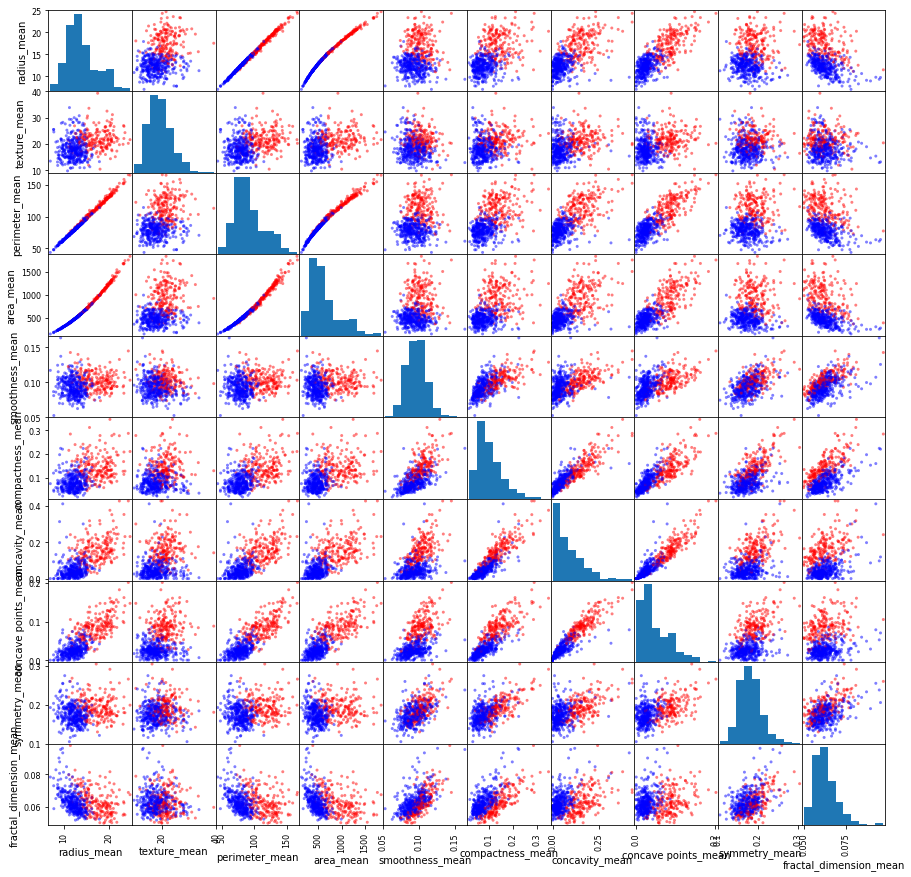

In [38]:
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

In [39]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [40]:
#check for SVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.6294117647058823

In [41]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [42]:
# I will First use cross validation with different model

In [43]:
# As we are going to use many models lets make a function
# Which we can use with different models
def classification_model(model,data,prediction_input,output):
    # here the model means the model 
    # data is used for the data 
    #prediction_input means the inputs used for prediction
    # output mean the value which are to be predicted
    # here we will try to find out the Accuarcy of model by using same data for fiiting and 
    #comparison for same data
    #Fit the model:
    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
  
    #Make predictions on training set:
    predictions = model.predict(data[prediction_input])
  
    #Print accuracy
    # now checkin accuracy for same data
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
 
    
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # as the data is divided into train and test using KFold
        # now as explained above we have fit many models 
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        train_X = (data[prediction_input].iloc[train,:])# in this iloc is used for index of trainig data
        # here iloc[train,:] means all row in train in kf amd the all columns
        train_y = data[output].iloc[train]# here is only column so it repersenting only row in train
        # Training the algorithm using the predictors and target.
        model.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

In [44]:
model = svm.SVC()
outcome_var= "diagnosis"
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 99.823%
Cross-Validation Score : 43.363%
Cross-Validation Score : 52.212%
Cross-Validation Score : 58.112%
Cross-Validation Score : 62.611%
Cross-Validation Score : 65.624%


In [45]:
model = RandomForestClassifier(n_estimators=100)
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 89.381%
Cross-Validation Score : 92.920%
Cross-Validation Score : 94.100%
Cross-Validation Score : 94.469%
Cross-Validation Score : 94.861%


In [46]:
model=LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 95.567%
Cross-Validation Score : 88.496%
Cross-Validation Score : 92.035%
Cross-Validation Score : 93.805%
Cross-Validation Score : 94.248%
Cross-Validation Score : 94.505%


 <h2>Tuning Parameters  using grid search CV</h2>

 *Lets Start with decision tree classifier
Tuning the parameters means using the best parameter for predict 
 there are many parameters need to model a Machine learning Algorithm
 for decision tree classifier refer this link [Link](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)*

In [47]:
data_X= data[prediction_var]
data_y= data["diagnosis"]

In [48]:
# lets Make a function for Grid Search CV
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=5,scoring="accuracy")
    # this is how we use grid serch CV we are giving our model
    # the we gave parameters those we want to tune
    # Cv is for cross validation
    # scoring means to score the classifier
    
    clf.fit(train_X,train_y)
    print("The best parameter found on development set is :")
    # this will gie us our best parameter to use
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    # this is the best score that we can achieve using these parameters#
    print(clf.best_score_)
    return clf.best_params_

<h3>Support Vector Machine with Grid Search CV</h3>


In [49]:
model=svm.SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'C': 10, 'kernel': 'linear'}
the bset estimator is 
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The best score is 
0.9543147208121827


{'C': 10, 'kernel': 'linear'}

<h3>Logistic Regression with Grid Search CV</h3>


In [50]:
model=LogisticRegression()
param_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
best_params=Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'C': 1000, 'penalty': 'l1'}
the bset estimator is 
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
The best score is 
0.9670050761421319


<h3> Logistic Regression Evaluation</h3> 

In [51]:
log_reg=LogisticRegression(C=100,penalty="l1").fit(train_X,train_y)

0.9882352941176471


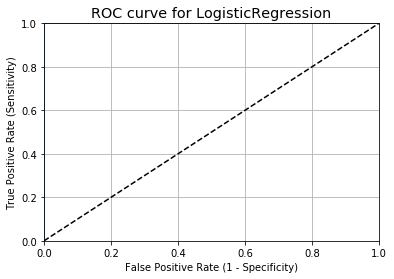

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
log_reg_predict = log_reg.predict(test_X)
log_reg_predict_proba = log_reg.predict_proba(test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, log_reg_predict_proba)
print(metrics.accuracy_score(log_reg_predict,test_y))

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for LogisticRegression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [53]:
print('LogisticRegression Accuracy: {:.2f}%'.format(accuracy_score(test_y, log_reg_predict) * 100))
print('LogisticRegression AUC: {:.2f}%'.format(roc_auc_score(test_y, log_reg_predict_proba) * 100))
print('LogisticRegression Classification report:\n\n', classification_report(test_y, log_reg_predict))

LogisticRegression Accuracy: 98.82%
LogisticRegression AUC: 100.00%
LogisticRegression Classification report:

              precision    recall  f1-score   support

          0       1.00      0.98      0.99       103
          1       0.97      1.00      0.99        67

avg / total       0.99      0.99      0.99       170

